<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png"><br />

Created by [Nathan Kelber](http://nkelber.com) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
___

# Concordance and Collocation

**Description:** This notebook describes how to create a concordance and collocation starting from text files and from a Constellate dataset file.

**Knowledge Required:** 
* Python Basics Series ([Start Python Basics I](../../PythonForDataAnalysis/GettingStarted/basic/python-basics-1.ipynb))

___

## Concordance

The concordance has a long history in humanities study and Roberto Busa's concordance Index Thomisticus—started in 1946—is arguably the first digital humanities project. Before computers were common, they were printed in large volumes such as John Bartlett's 1982 reference book *A Complete Concordance to Shakespeare*—it was 1909 pages pages long! 

A concordance gives the context of a given word or phrase in a body of texts. For example, a literary scholar might ask: how often and in what context does Shakespeare use the phrase "honest Iago" in Othello? A historian might examine a particular politician's speeches, looking for examples of a particular [dog whistle](https://en.wikipedia.org/wiki/Dog_whistle_(politics)https://en.wikipedia.org/wiki/Dog_whistle_(politics)).

<font color="red">Read more</font>

* Geoffrey Rockwell and Stéfan Sinclair. [Tremendous Mechanical Labor: Father Busa's Algorithm](http://www.digitalhumanities.org/dhq/vol/14/3/000456/000456.html) (2020)
* Julianne Nyhan and Marco Passarotti, eds. [One Origin of Digital Humanities: Fr Roberto Busa in His Own Words](https://www.amazon.com/One-Origin-Digital-Humanities-Roberto/dp/3030183114/) (2019)
* Julianne Nyhan and Melissa Terras. [Uncovering 'hidden contributions to the history of Digital Humanities: the Index Thomisticus' femal keypunch operators](https://discovery.ucl.ac.uk/id/eprint/10052279/9/Nyhan_DH2017.redacted.pdf) (2017)
* Steven E. Jones [Roberto Busa, S.J., and the Emergence of Humanities Computing](https://www.routledge.com/Roberto-Busa-S-J-and-the-Emergence-of-Humanities-Computing-The-Priest/Jones/p/book/9781138587250) (2016)
___

We will be working with The Folger Shakespeare, made freely available by the [The Folger Shakespeare Library](https://shakespeare.folger.edu/).

In [1]:
# Data for this lesson
import urllib.request
from pathlib import Path

# Check if a data folder exists. If not, create it.
data_folder = Path('../data/')
data_folder.mkdir(exist_ok=True)

download_urls = [
    'https://shakespeare.folger.edu/downloads/txt/shakespeares-works_TXT_FolgerShakespeare.zip',
]

for url in download_urls:
    urllib.request.urlretrieve(url, '../data/' + url.rsplit('/', 1)[-1])

In [2]:
# Extract the text files
import zipfile

with zipfile.ZipFile('../data/shakespeares-works_TXT_FolgerShakespeare.zip', 'r') as zf:
    zf.extractall('../data/shakespeare/')

Now that we have our data downloaded and extracted, we will load a single text for our analysis. Feel free to choose a different Shakespeare text to change the analysis.

In [3]:
# Open a text
with open("../data/shakespeare/othello_TXT_FolgerShakespeare.txt") as f:
    file_contents = f.read()

Next, we lowercase our text and use the Natural Language Toolkit (NLTK) to tokenize it. Tokenizing breaks up the the document into individual words. Finally, we use our tokens to create an NLTK Text object.

In [4]:
# Tokenize one of the files
import nltk
nltk.download('punkt', download_dir='../data/nltk_data')
file_contents = file_contents.lower()
tokens = nltk.word_tokenize(file_contents)
text = nltk.Text(tokens)

[nltk_data] Downloading package punkt to ../data/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
# Verify that we have created an NLTK Text object
type(text)

nltk.text.Text

Now, we can create a concordance with the `.concordance()` method. We pass in a string and the results are printed.

In [6]:
# Create a concordance for the given word
text.concordance('honest')

Displaying 25 of 42 matches:
e 's old , cashiered . whip me such honest knaves ! others there are who , tri
ee not to haunt about my doors . in honest plainness thou hast heard me say my
rs , cassio , and officers exit . ] honest iago , my desdemona must i leave to
ree and open nature that thinks men honest that but seem to be so , and will a
 the pegs that make this music , as honest as i am . othello come . let us to 
i look to 't . othello iago is most honest . michael , goodnight . tomorrow wi
an engraffed infirmity . it were an honest action to say so to the moor . iago
ty . what is the matter , masters ? honest iago , that looks dead with grievin
o , my reputation ! iago as i am an honest man , i thought you had received so
test , in the sincerity of love and honest kindness . cassio i think it freely
 to the watch . cassio good night , honest iago . [ cassio exits . ] iago and 
when this advice is free i give and honest , probal to thinking , and indeed t
nclining desdemona to s

By default, the first 25 matches are printed along with 80 characters on each side of our string text. We can specify that more lines should be shown using a `lines` and `width` argument that accept integers.

In [7]:
# Create a concordance for the given word
# Increasing lines shown and number of characters
text.concordance('honest', lines=50, width=100)

Displaying 42 of 42 matches:
 and when he 's old , cashiered . whip me such honest knaves ! others there are who , trimmed in for
 charged thee not to haunt about my doors . in honest plainness thou hast heard me say my daughter i
 the senators , cassio , and officers exit . ] honest iago , my desdemona must i leave to thee . i p
r is of a free and open nature that thinks men honest that but seem to be so , and will as tenderly 
ll set down the pegs that make this music , as honest as i am . othello come . let us to the castle.
l eye will i look to 't . othello iago is most honest . michael , goodnight . tomorrow with your ear
ith one of an engraffed infirmity . it were an honest action to say so to the moor . iago not i , fo
her propriety . what is the matter , masters ? honest iago , that looks dead with grieving , speak .
ation , iago , my reputation ! iago as i am an honest man , i thought you had received some bodily w
 iago i protest , in the sincerity of love and honest kindness

If we want to supply a bigram, trigram, or longer construction, they are supplied as individual strings within a Python list. (If you try to supply a string with a space in the middle, there will be no results.)

In [8]:
# Create a concordance for a sequence of words
text.concordance(['honest', 'iago'])

Displaying 5 of 5 matches:
 , cassio , and officers exit . ] honest iago , my desdemona must i leave to th
 . what is the matter , masters ? honest iago , that looks dead with grieving ,
o the watch . cassio good night , honest iago . [ cassio exits . ] iago and wha
hello no . his mouth is stopped . honest iago hath ta'en order for 't . desdemo
y friend , thy husband ; honest , honest iago . emilia if he say so , may his p


This method works well for a quick preview of the lines, but if we want to save this concordance for later analysis we can use the `.concordance_list()` method. The `.concordance_list()` method outputs a list, but the elements of that list *are not* simple strings. They are ConcordanceLine objects.

In [9]:
# Output the concordance data
output_list = text.concordance_list(['honest', 'iago'], width=200, lines=50)

In [10]:
type(output_list[0])

nltk.text.ConcordanceLine

We can view individual lines by using a Python list index followed by `.line`.

In [11]:
output_list[0].line

'] othello my life upon her faith ! [ the duke , the senators , cassio , and officers exit . ] honest iago , my desdemona must i leave to thee . i prithee let thy wife attend on her , and bring them a'

If we want to save our concordance, we can write to a file line-by-line.

In [12]:
# Writing the concordance to a text file

with open('../data/concordance.txt', 'w') as f:
    for i in range(len(output_list)):
        f.write(output_list[i].line)
        f.write('\n')

Lastly, NLTK can create a dispersion plot that helps visualize where tokens occur in the document. This can reveal the way words are used in the document over time.

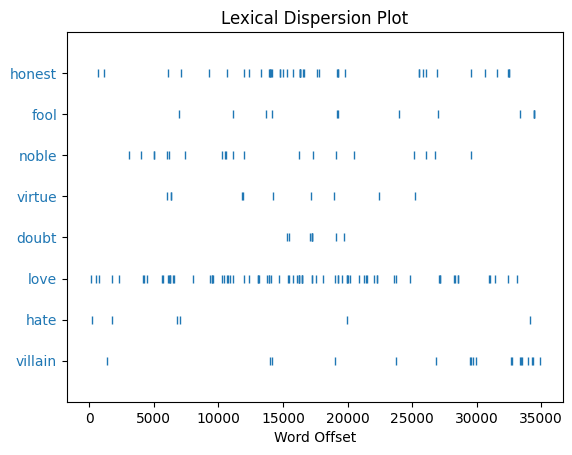

In [15]:
text.dispersion_plot(['honest', 'fool', 'noble', 'virtue', 'doubt', 'love', 'hate', 'villain'])

## Concordance with Constellate Data
In order to create a concordance from a Constellate text, you will need to make sure you have access to the "full-text" version of the document. In the Dataset Builder, there is an option for "full-text" only.

Secondly, in the dataset dashboard, you should request the JSON-L file which contains the full text. Under the tile for the dataset, choose "Download" > "More Download Options". Then click "Request" under "Metadata, ngrams, and full-text."

In [ ]:
# Creating a variable `dataset_id` to hold our dataset ID
# The default dataset is Full-Text books on Frederick Douglass
# from Docsouth Data
dataset_id = "435d4b79-d600-36f9-60df-f1f27afb7d37"

# Import the `constellate` client
import constellate

# To download the full dataset (up to a limit of 25,000 documents),
# request it first in the dataset dashboard. See the Constellate Client
# documentation at: https://constellate.org/docs/constellate-client
# Then use the `constellate.download` method show below.
dataset_file = constellate.download(dataset_id, 'jsonl')

There are only 63 documents in this dataset, so we can easily search through to pick out one of interest.

In [ ]:
# Examine the documents in the dataset

for document in constellate.dataset_reader(dataset_file):
    print('\n')
    document_id = document.get('id')
    document_title = document.get('title')
    document_author = document.get('creator')
    print(f'ID: {document_id}')
    print(f'Title: {document_title}')
    print(f'Author: {document_author}')


Let's use Frederick Douglass's:

>NARRATIVE OF THE LIFE OF FREDERICK DOUGLASS,  AN AMERICAN SLAVE. Written by Himself:  Electronic Edition.

The corresponding ID is: `http://docsouth.unc.edu/neh/douglass/menu.html`

Note that this is also a URL which takes us to the Docsouth project where the document is described.

We can select the document by matching on the document `'id'` key and then copy the full-text, which is stored as the value for the key `'fullText'`. 

In [ ]:
# Retrieve the full-text of the document selected
# Here we select 

text = ''
for document in constellate.dataset_reader(dataset_file):
    if document['id'] == 'http://docsouth.unc.edu/neh/douglass/menu.html':
        text = document.get('fullText')


We will out the contents to a text file, so we have a local copy of the document.

In [19]:
# Write the text to a file
with open('../data/document.txt', 'w') as f:
    for line in text:
        f.write(line)

And then read the document back in. (Writing the document out to a file and reading it back also removes all the Python escape characters.)

In [20]:
# Read the text from the file
with open("../data/document.txt") as f:
    file_contents = f.read()

Next, we tokenize the document using the Natural Language Toolkit (NLTK).

In [21]:
# Tokenize the file
import nltk
file_contents = file_contents.lower()
tokens = nltk.word_tokenize(file_contents)
text = nltk.Text(tokens)

And we are ready to create a concordance.

In [ ]:
text.concordance('freedom', lines=50, width=100)

We can write our concordance out to a new file.

In [23]:
# Output the concordance data
output_list = text.concordance_list('freedom', width=200, lines=50)

In [24]:
# Writing the concordance to a text file

with open('../data/concordance.txt', 'w') as f:
    for i in range(len(output_list)):
        f.write(output_list[i].line)
        f.write('\n')

And visualize the distribution of words across the text in a lexical dispersion plot.

In [ ]:
text.dispersion_plot(['free', 'knowledge', 'read', 'desire'])

## Collocations

Collocations are concepts in a text that cannot be expressed in a single word. English speakers can usually recognize collocations when we see them.

Consider the concepts mentioned in this sentence:
> The machine learning algorithm helped solve a major problem in social science research.

There are bigrams and trigrams which are collocations, cohesive units that describe a larger concept:

* 'machine learning algorithm' (a three-word, trigram)
* 'major problem' (a two-word, bigram)
* 'social science research'(a three-word, trigram)

Yet other bigrams and trigrams in the sentence are not collocations:

* 'The machine'
* 'learning algorithm helped'
* 'helped solve a'
* 'problem in social'

Identifying a collocation is more complicated than simply finding words that commonly co-occur. The phrase 'of the' occurs in many texts, but it is not a collocation since it does not relate to a larger, defined concept.

Linguists and Natural Language Processing researchers have sought to create a mathematical method for discovering collocations. Here are some of the effective methods:

* Finding frequent bigrams and trigrams (while removing spaces, stop words, articles, prepositions, and pronouns)
* Pointwise Mutual Information (measuring how likely a word is to appear alone vs. paired with another)
* [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) (while removing spaces, stop words, articles, prepositions, and pronouns)
* [chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test)

All of these methods can be effective. We will demonstrate Pointwise Mutual Information (PMI).

In [26]:
# Open a text
with open("../data/document.txt") as f:
    file_contents = f.read()

In [27]:
# Tokenize one of the files
import nltk
file_contents = file_contents.lower()
tokens = nltk.word_tokenize(file_contents)
removed_punctuation = [token for token in tokens if token.isalnum()] # We remove all punctuation with a list comprehension
text = nltk.Text(removed_punctuation)

In [28]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [ ]:
finder = BigramCollocationFinder.from_words(text)
finder.nbest(bigram_measures.pmi, 10)

Pointwise Mutual Information is very sensitive to words that are "highly-connected" but also occur very infrequently. To get good results, we need to filter out bigrams that rarely occur.

In [30]:
# Filter out Bigrams that occur less than three times
finder.apply_freq_filter(3)

In [ ]:
finder.nbest(bigram_measures.pmi, 25)

We can also discover common trigram collocations.

In [ ]:
finder = TrigramCollocationFinder.from_words(text)
finder.apply_freq_filter(3)
#finder.apply_word_filter(lambda w: w in ('I', 'me')) Remove particular words with a lambda function
finder.nbest(trigram_measures.pmi, 25)